# 一、爬虫并保存数据

In [2]:
import requests
import json
import chardet
import re 
import pandas as pd # 用于数据分析
import jieba # 用于分词统计出现的关键词
from wordcloud import WordCloud # 筛选词云图展示的词
# from pyecharts.charts import WordCloud
import matplotlib.pyplot as plt # 实现绘图可视化
from imageio import imread # 图片库，读取照片RGB内容，转换照片格式
# python通过调用warnings模块中定义的warn()函数来发出警告。我们可以通过警告过滤器进行控制是否发出警告消息
import warnings
warnings.filterwarnings("ignore") # 忽略警告信息
import stylecloud

In [ ]:
# 1.根据bvid请求得到cid
def get_cid():
    url = 'https://api.bilibili.com/x/player/pagelist?bvid=BV1mX4y1w7vT&jsonp=jsonp'
    res = requests.get(url).text
    json_dict = json.loads(res)
    #pprint(json_dict)
    return json_dict["data"][0]["cid"]

In [ ]:
#2.根据cid请求弹幕，解析弹幕得到最终的数据

def get_data(cid):
    final_url = "https://api.bilibili.com/x/v1/dm/list.so?oid=" + str(cid)
    final_res = requests.get(final_url)
    final_res.encoding = chardet.detect(final_res.content)['encoding']
    final_res = final_res.text
    pattern = re.compile('<d.*?>(.*?)</d>') #通过正则解析式提取出文本内容
    data = pattern.findall(final_res)
    #pprint(final_res)
    return data

In [ ]:
# 将数据保存到txt

# def save_to_file(data):
#     with open(r"D:\系统默认\桌面\李子柒弹幕.txt", mode="w", encoding="utf-8") as f:
#         for i in data:
#             f.write(i)
#             f.write("\n")

cid = get_cid()
data = get_data(cid)
# save_to_file(data)

In [23]:
#将数据保存到excel
danmu_list = []
for i in data:
    danmu_list.append(i)
danmu = pd.DataFrame(danmu_list)
danmu.to_csv("D:/李子柒.csv",encoding="utf-8-sig",index=False,header=1)

# 二、文本分析

### 2.1 查看数据

In [5]:
import pandas as pd # 用于数据分析
import jieba # 用于分词统计出现的关键词

In [6]:
danmu1 = pd.read_csv("D:/李子柒.csv")

In [7]:
#修改列名
danmu1.rename(columns={'0':"弹幕内容"},inplace=True)
danmu1

,弹幕内容
0,泪水从嘴角留下
1,大佬坐姿
2,鸡：看看以后炖我的方法～
3,柒：拿来吧你
4,熟悉的蓝莲花
...,...
3595,观看人数
3596,夏天用这个不是正合适?
3597,柒李子
3598,慕了慕了


In [8]:
danmu1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   弹幕内容    3600 non-null   object
dtypes: object(1)
memory usage: 28.2+ KB


In [9]:
danmu1.describe()

,弹幕内容
count,3600
unique,2982
top,观看人数
freq,71


### 2.2 jieba分词

In [10]:
import jieba # 用于分词统计出现的关键词

In [11]:
#第一种，使用apply，对列中每一个值都采用jieba分词的方法
danmu1['弹幕内容'].apply(jieba.lcut)

Building prefix dict from the default dictionary ...
Loading model from cache D:\temps\jieba.cache
Loading model cost 0.597 seconds.
Prefix dict has been built successfully.


0                      [泪水, 从, 嘴角, 留下]
1                             [大佬, 坐姿]
2       [鸡, ：, 看看, 以后, 炖, 我, 的, 方法, ～]
3                     [柒, ：, 拿来, 吧, 你]
4                         [熟悉, 的, 蓝莲花]
                     ...              
3595                          [观看, 人数]
3596           [夏天, 用, 这个, 不是, 正合适, ?]
3597                           [柒, 李子]
3598                        [慕了, 慕, 了]
3599                          [观看, 人数]
Name: 弹幕内容, Length: 3600, dtype: object

In [12]:
#第二种：先把用values去除这列的值，然后用str转换为字符串，最后才能进行jieba分词
danmu_cut2 = jieba.lcut(str(danmu1['弹幕内容'].values),cut_all = False) #cut_all = False 使用精准模式

danmu_cut2

['[',
 "'",
 '泪水',
 '从',
 '嘴角',
 '留下',
 "'",
 ' ',
 "'",
 '大佬',
 '坐姿',
 "'",
 ' ',
 "'",
 '鸡',
 '：',
 '看看',
 '以后',
 '炖',
 '我',
 '的',
 '方法',
 '～',
 "'",
 ' ',
 '...',
 ' ',
 "'",
 '柒',
 '李子',
 "'",
 ' ',
 "'",
 '慕了',
 '慕',
 '了',
 "'",
 ' ',
 "'",
 '观看',
 '人数',
 "'",
 ']']

In [15]:
danmu_cut1 = danmu1['弹幕内容'].apply(jieba.lcut)

In [16]:
#加载停用词列表
with open(r'D:\系统默认\桌面\停用词.txt',encoding='utf-8-sig') as f:
    stopword = f.read()
# stopword

In [16]:
#第一种方法，定义空列表
danmu_cut_afterstop = []
for i in danmu_cut1:
    if i not in stopword:
        danmu_cut_afterstop.append(i)
danmu_cut_afterstop

TypeError: 'in <string>' requires string as left operand, not list

In [26]:
danmu_cut1[0]#报错，因为遍历出来的是列表而不是字符串

['泪水', '从', '嘴角', '留下']

In [27]:
#改进第一种方法，嵌套多一层循环，遍历出每一个词
danmu_cut_afterstop2 = []
for i in danmu_cut1:
    for word in i:
        if word not in stopword:
            danmu_cut_afterstop2.append(word)
danmu_cut_afterstop2 #成功不报错

['泪水',
 '嘴角',
 '留下',
 '大佬',
 '坐姿',
 '鸡',
 '炖',
 '方法',
 '柒',
 '拿来',
 '熟悉',
 '蓝莲花',
 '一身',
 '第二天',
 '剛剛',
 '已經',
 '吃',
 '撐',
 '現在',
 '覺得',
 '餓',
 '吃',
 '牛肉',
 '味',
 '淀粉',
 '哈哈哈哈',
 '四川人',
 '懂得',
 '百草园',
 '解锁',
 '场景',
 '狗子',
 '吃',
 '李子',
 '吃',
 '呜呜',
 '呜呜',
 '呜呜',
 '呜呜',
 '好想哭',
 '注入',
 '灵魂',
 '愛',
 '哈哈哈哈',
 '噔',
 '噔',
 '蹬',
 '盐城人',
 '狂喜',
 '藤椒',
 '黄',
 '李子',
 '甜',
 '真的',
 '太漂亮',
 '蜂糖',
 '李超',
 '甜',
 '星空',
 '好美',
 '淀粉',
 '掺',
 '牛肉丸',
 '牛肉',
 '自贡',
 '盐',
 '自贡',
 '爱',
 '爱',
 '自贡',
 '拔',
 '葱',
 '熟练',
 '心疼',
 '乒乓',
 '牛肉丸',
 '太有',
 '韵味',
 '意境',
 '好家伙',
 '听不懂',
 '好家伙',
 '八大',
 '杠',
 '丸子',
 '裂开',
 '水里',
 '菜',
 '大部分',
 '好像',
 '凉菜',
 '厉害',
 '绵阳',
 '包盐',
 '蛋',
 '喜欢',
 '吃',
 '自贡',
 '灯会',
 '牛',
 '手里',
 '饭',
 '吃',
 '不香',
 '想起',
 '中学',
 '门口',
 '土豆',
 '晚自习',
 '好像',
 '一盒',
 '自贡',
 '世外桃源',
 '大佬',
 '坐姿',
 '加炸过',
 '蒜蓉',
 '无敌',
 '救命',
 '味道',
 '呛到',
 '荷叶',
 '兄弟',
 '鸡',
 '感觉',
 '杀气',
 '助理',
 '小姐姐',
 '可爱',
 'bgm',
 '月光',
 '变奏曲',
 '好久',
 '终于',
 '热水',
 '保温',
 '看热闹',
 '化学',
 '啊啊啊',
 '姐姐',
 '绝美',
 'h',
 'h',
 '熊猫',

In [39]:
#第二种方法，使用apply去除停用词，成功
danmu_cut_afterstop = danmu_cut1.apply(lambda x:[i for i in x if i not in stopword])

,弹幕内容
0,"[泪水, 嘴角, 留下]"
1,"[大佬, 坐姿]"
2,"[鸡, 炖, 方法]"
3,"[柒, 拿来]"
4,"[熟悉, 蓝莲花]"
...,...
3595,"[观看, 人数]"
3596,"[夏天, 正合适]"
3597,"[柒, 李子]"
3598,"[慕了, 慕]"


### 词频统计

In [50]:
text = []
for i in danmu_cut_afterstop:
    for a in i:
        text.append(a)
        
frequency = pd.DataFrame(text).value_counts()
frequency

吃      148
自贡     102
黄瓜      93
李子      86
盐       78
      ... 
小帅       1
小摇玉      1
小朋友      1
小生       1
捧        1
Length: 2926, dtype: int64

In [53]:
from nltk import FreqDist
freqlist = FreqDist(text)
most_common = freqlist.most_common(10)
most_common

[('吃', 148),
 ('自贡', 102),
 ('黄瓜', 93),
 ('李子', 86),
 ('盐', 78),
 ('人数', 75),
 ('观看', 75),
 ('好吃', 72),
 ('想', 63),
 ('鸡', 61)]

### nltk

In [17]:
import nltk
from nltk.corpus import brown
from nltk import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk import FreqDist

In [57]:
#找出弹幕中最常出现的10个词
freq_list = FreqDist(danmu1['弹幕内容'])
most_common_words = freq_list.most_common(50)
most_common_words

[('观看人数', 71),
 ('来了', 34),
 ('来了来了', 28),
 ('黄瓜', 28),
 ('哇', 24),
 ('2000+', 22),
 ('卧槽', 14),
 ('水煮牛肉', 13),
 ('儿豁', 13),
 ('绝了', 9),
 ('6000+', 9),
 ('来啦', 9),
 ('注入灵魂', 8),
 ('铁线莲', 8),
 ('好美啊', 7),
 ('哇塞', 7),
 ('牛逼', 7),
 ('求bgm', 7),
 ('潮汕人狂喜', 7),
 ('大佬坐姿', 6),
 ('失踪人口回归', 6),
 ('李子', 6),
 ('好美', 6),
 ('好家伙', 6),
 ('来啦来啦', 6),
 ('热乎', 6),
 ('人不如狗', 6),
 ('美', 5),
 ('姐姐好美', 5),
 ('哈哈哈哈', 5),
 ('生日快乐', 5),
 ('芫荽', 5),
 ('流水席', 5),
 ('老婆', 5),
 ('上流', 5),
 ('桔梗花', 4),
 ('3000+', 4),
 ('好可爱', 4),
 ('哈哈哈哈哈哈哈', 4),
 ('蒸发结晶', 4),
 ('勾芡', 4),
 ('自贡人报道', 4),
 ('yyds', 4),
 ('热乎的', 4),
 ('好饿', 4),
 ('中国桔梗', 4),
 ('桔梗', 4),
 ('。', 4),
 ('香汗淋漓', 4),
 ('撒尿牛丸', 4)]

# 三、制作词云

# 3.1 使用mask蒙版的方式

In [54]:
import wordcloud #词云展示库
from PIL import Image,ImageDraw,ImageFont#图像处理库
import matplotlib.pyplot as plt

In [63]:
mask= plt.imread(r'D:/系统默认/桌面/李子柒.jpg') #jepg文件就是你想要展示词云的背景图片

(-0.5, 21599.5, 14399.5, -0.5)

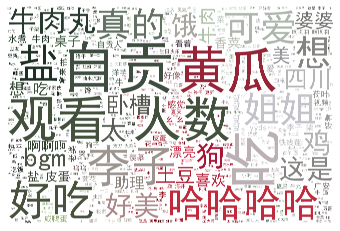

In [66]:
wc=wordcloud.WordCloud(
    scale=20,
    background_color='white',
    font_path='C:\Windows\Fonts\simhei.ttf', #设置字体格式以显示中文
    mask=mask,
    max_words=500, #设置所展示词组数量的最大值
    max_font_size=200, #设置字体的最大值
    random_state=20
)
wc.generate(" ".join(text)) #从文本生成词云
image_colors=wordcloud.ImageColorGenerator(mask) #获取背景图颜色信息
wc.recolor(color_func=image_colors) #将词云颜色设置为背景图颜色
plt.imshow(wc,interpolation='bilinear') #显示词云
plt.axis('off') #关闭坐标轴

### 3.2 不使用mask蒙版

In [108]:
#jieba分词
newword = jieba.lcut("".join(data))
newword
pd.DataFrame(newword)

with open("D:/系统默认/桌面/停用词.txt",encoding="utf-8-sig") as f:
    stopwords = f.read()
    
newdata = []
for i in newword:
    if i not in stopwords:
        newdata.append(i)
newdata

['泪水',
 '嘴角',
 '留下',
 '大佬',
 '坐姿',
 '鸡',
 '炖',
 '方法',
 '柒',
 '拿来',
 '熟悉',
 '蓝莲花',
 '一身',
 '第二天',
 '剛剛',
 '已經',
 '吃',
 '撐',
 '現在',
 '覺得',
 '餓',
 '吃',
 '牛肉',
 '味',
 '淀粉',
 '哈哈哈哈',
 '四川人',
 '懂得',
 '百草园',
 '解锁',
 '场景',
 '狗子',
 '吃',
 '李子',
 '吃',
 '呜呜',
 '呜呜',
 '呜呜',
 '呜呜',
 '好想哭',
 '注入',
 '灵魂',
 '愛',
 '哈哈哈哈',
 '噔',
 '噔',
 '蹬',
 '盐城人',
 '狂喜',
 '藤椒',
 '黄',
 '李子',
 '甜',
 '真的',
 '太漂亮',
 '蜂',
 '糖',
 '李超',
 '甜',
 '星空',
 '好美',
 '淀粉',
 '掺',
 '牛肉丸',
 '牛肉',
 '自贡',
 '盐',
 '自贡',
 '爱',
 '爱',
 '自贡',
 '拔',
 '葱',
 '熟练',
 '心疼',
 '乒乓',
 '牛肉丸',
 '太有',
 '韵味',
 '意境',
 '好家伙',
 '听不懂',
 '好家伙',
 '八大',
 '杠',
 '丸子',
 '裂开',
 '水里',
 '菜',
 '大部分',
 '好像',
 '凉菜',
 '厉害',
 '绵阳',
 '包盐',
 '蛋',
 '喜欢',
 '吃',
 '自贡',
 '灯会',
 '牛',
 '手里',
 '饭',
 '吃',
 '不香',
 '想起',
 '中学',
 '门口',
 '土豆',
 '晚自习',
 '好像',
 '一盒',
 '自贡',
 '世外桃源',
 '大佬',
 '坐姿',
 '加炸过',
 '蒜蓉',
 '无敌',
 '救命',
 '味道',
 '呛到',
 '荷叶',
 '兄弟',
 '鸡',
 '感觉',
 '杀气',
 '助理',
 '小姐姐',
 '可爱',
 'bgm',
 '月光',
 '变奏曲',
 '好久',
 '终于',
 '热水',
 '保温',
 '看热闹',
 '化学',
 '啊啊啊',
 '姐姐',
 '绝美',
 'h',
 'h',
 

In [ ]:
#定义词云颜色函数
import random
from random import randint
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = randint(120, 250)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

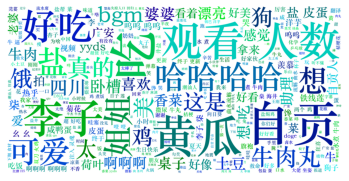

In [107]:
# mask = imageio.imread('D:/系统默认/桌面/Austin的头像.jpg')
w = WordCloud(
    font_path='C:\Windows\Fonts\STZHONGS.TTF',
    background_color="white",
    height=1000,
    width = 2000,
    max_words=300,
    max_font_size= 300,
    color_func=random_color_func
   # mask=mask
)
w_image = w.generate(" ".join(newdata))
plt.imshow(w_image)
plt.axis("off")
plt.show()
w_image.to_file("D:/李子柒词云.png")